In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Download dataset

In [5]:
from tensorflow.examples.tutorials.mnist import input_data

In [6]:
mnist = input_data.read_data_sets("/data",one_hot = True)

Extracting /data\train-images-idx3-ubyte.gz
Extracting /data\train-labels-idx1-ubyte.gz
Extracting /data\t10k-images-idx3-ubyte.gz
Extracting /data\t10k-labels-idx1-ubyte.gz


In [14]:
X_training = mnist.train.images[:1000]
Y_training = mnist.train.labels[:1000]
X_test = mnist.test.images[:200]
Y_test = mnist.test.labels[:200]

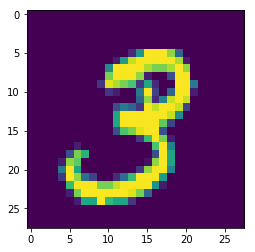

In [15]:
plt.imshow(X_training[1].reshape((28,28)))

In [16]:
Y_training[1]

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.])

In [39]:
# Placeholder
X = tf.placeholder(tf.float32,[None,784])
Y = tf.placeholder(tf.float32,[None,10])

In [40]:
#Variable
W = tf.Variable(tf.zeros([784,10]),name ="Weight")
b = tf.Variable(tf.zeros([10]),name ="bias")

In [50]:
y_pre = tf.matmul(X,W) + b
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y,logits=y_pre))

In [51]:
# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(loss)

In [53]:
init = tf.global_variables_initializer()

In [68]:
with tf.Session() as sess :
    sess.run(init)
    for i in range(1000):
        batch_size = np.random.randint(len(X_training),size = 50)
        sess.run(optimizer,feed_dict={X:X_training[batch_size],Y:Y_training[batch_size]})
    correct = tf.equal(tf.arg_max(y_pre,1),tf.arg_max(Y,1))
    accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))
    print(sess.run(accuracy,feed_dict={X:X_test,Y:Y_test}))
    

0.895
